## 双均线策略实例

![title](./img/2.png)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv',index_col=0,parse_dates=True)

In [3]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


### 分别计算短期和长期均线

- 1.选择苹果股价数据并去掉缺失值
- 2.计算短期与长期均线
- 3.标记短期与长期均线位置关系

In [6]:
data = data[['AAPL.O']].dropna()

In [7]:
data.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


In [8]:
SMA1 = 42
SMA2 = 252

In [9]:
data['SMA1'] = data.rolling(SMA1).mean()

In [12]:
data['SMA2'] = data['AAPL.O'].rolling(SMA2).mean()

In [14]:
data.tail()

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627
2018-06-29,185.11,187.470476,168.901032


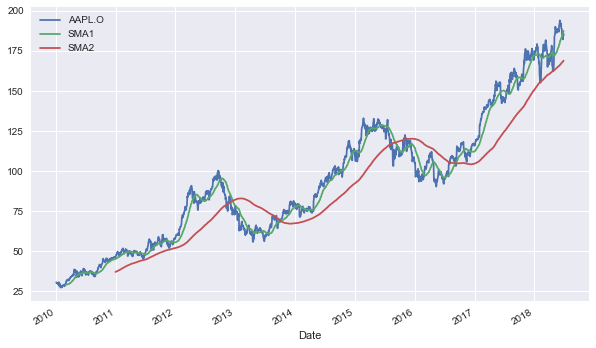

In [15]:
data.plot(figsize=(10,6))

In [16]:
data.dropna(inplace=True)

In [17]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

In [18]:
data.head()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2010-12-31,46.079954,45.280967,37.120735,1
2011-01-03,47.081381,45.349708,37.186246,1
2011-01-04,47.327096,45.412599,37.252521,1
2011-01-05,47.714238,45.466102,37.322266,1
2011-01-06,47.675667,45.522565,37.392079,1


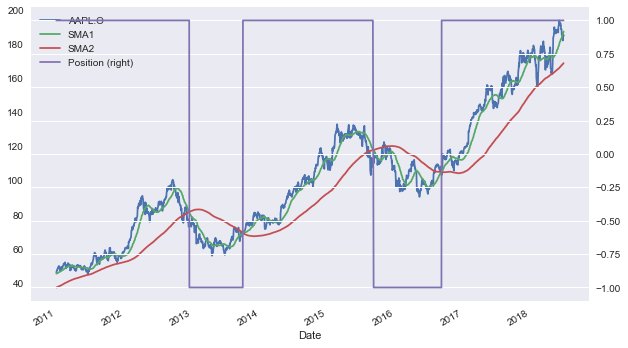

In [19]:
data.plot(secondary_y='Position',figsize=(10,6))

### 策略实施
- 分别计算无策略和均线策略时的报酬率

In [20]:
data['Returns'] = np.log(data['AAPL.O']/data['AAPL.O'].shift(1))

In [27]:
data.head()

,AAPL.O,SMA1,SMA2,Position,Returns
Date,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809


In [28]:
data['Strategy'] = data['Position'].shift(1)*data['Returns']

In [29]:
data.head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809


In [30]:
data.dropna(inplace=True)

In [32]:
np.exp(data[['Returns','Strategy']].sum())

Returns     4.017148
Strategy    5.811299
dtype: float64

### 短期与长期均线选择多少天合适呢？
- 遍历不同短期与长期数值

In [62]:
data = pd.read_csv('data.csv',index_col=0,parse_dates=True)


In [63]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [64]:
from itertools import product
sma1 = range(20,61,4)
sma2 = range(180,281,10)

In [67]:
results = pd.DataFrame()
for SMA1,SMA2 in product(sma1,sma2):
    data = pd.DataFrame(data['AAPL.O'])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['AAPL.O']/data['AAPL.O'].shift(1))
    data['SMA1'] = data['AAPL.O'].rolling(SMA1).mean()
    data['SMA2'] = data['AAPL.O'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
    data['Strategy'] = data['Position'].shift(1)*data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns','Strategy']].sum())
    results = results.append(pd.DataFrame({'SMA1':SMA1,'SMA2':SMA2,'Returns':perf['Returns'],'Strategy':perf['Strategy'],'Out':perf['Strategy']-perf['Returns']},
                                         index=[0]),ignore_index=True)

In [69]:
results.head(10)

,SMA1,SMA2,Returns,Strategy,Out
0,20,180,3.902455,3.690444,-0.212011
1,20,190,2.390766,3.111294,0.720528
2,20,200,2.491063,3.041649,0.550586
3,20,210,2.436072,2.732984,0.296911
4,20,220,1.832772,2.075347,0.242575
5,20,230,1.546191,1.709458,0.163267
6,20,240,1.876242,1.530970,-0.345272
7,20,250,1.231276,1.231276,0.000000
8,20,260,1.000000,1.000000,0.000000
9,20,270,1.000000,1.000000,0.000000
